In [1]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio
import soundfile

import warnings
warnings.filterwarnings("ignore")

from composition.common import (
    sinusoid, sweeping_sinusoid, line_segment, constant, triangle, square, adsr,
    to_db_loudness, generate_audio, autotune, SECOND
)

# Required for restoring loudness statistics, even though it is not used in this notebook.
from utils import QuantileTransformer

plt.rcParams['figure.figsize'] = (15, 5)

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


- Violin 55-103
- Viola 48-91
- Cello 36-76
- Flute 60-96
- Flute2 55-91

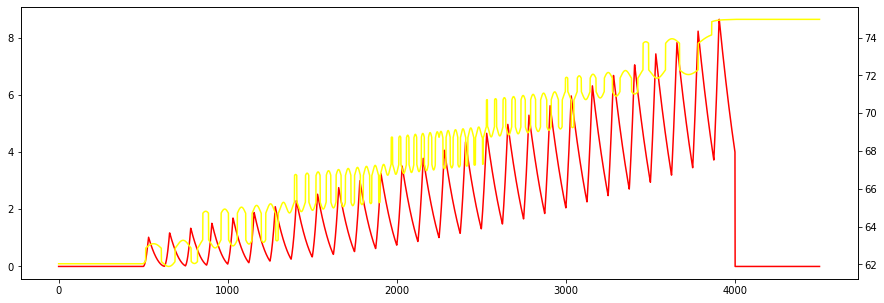

In [2]:
instrument = 'violin'
duration = 14
padding = constant(2, 1)

loudness = triangle(duration, 2, 0.25)
loudness += line_segment(duration, 0, 2)
# loudness = adsr(4, 4, 2, 4, 1, 0.5)
loudness = np.concatenate([padding * 0, loudness, padding * 0]) ** 2

pitch = line_segment(duration, 62, 74)
# pitch = sinusoid(duration, 0.05, 72, 12)
modulation = np.concatenate([
    sweeping_sinusoid(duration / 2, 1, 6, 0.1),
    sweeping_sinusoid(duration / 2, 6, 0.1, 0.1)
])
pitch += modulation
pitch = autotune(pitch, 0.7, 'melodic_minor')
pitch = np.concatenate([padding * pitch[0], pitch, padding * pitch[-1]])

fig,ax = plt.subplots()
ax2=ax.twinx()
ax.plot(loudness, color='red')
ax2.plot(pitch, color='yellow')

In [3]:
audio = generate_audio(instrument, pitch, loudness, db_offset=-8.)
Audio(audio, rate=16000)